In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 5)


In [4]:
DATA_PATH = r"C:\Users\tomla\Desktop\projet-pret\data\donnees_pret.xlsx"


df = pd.read_excel(DATA_PATH)

print("Aperçu des données :")
display(df.head())

print("\nInfos sur le DataFrame :")
print(df.info())



Aperçu des données :


,PRET,Intercept,TX_ENDET (X1),ANTEC (X2),PRIX(X3),REVENU(X4),MARIAGE (X5),EMP (X6),TAUX (X7),TX_EFF,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,128000.0,1.0,34.099998,0.0,160000.0,4583.0,1.0,0.0,1.0,22.540001,...,Intercept,TX_ENDET (X1),ANTEC (X2),Ln prix(X3),Ln revenue(X4),MARIAGE (X5),EMP (X6),TAUX (X7),Y pred,Résidu
1,128000.0,1.0,26.000000,0.0,143000.0,2666.0,0.0,1.0,0.0,19.000000,...,1,34.099998,0,11.982929,8.430109,1,0,1,151388.495629,-23388.495629
2,66000.0,1.0,37.000000,1.0,110000.0,3000.0,1.0,0.0,0.0,24.000000,...,1,26,0,11.8706,7.888335,0,1,0,95475.776414,32524.223586
3,120000.0,1.0,32.099998,0.0,134000.0,2583.0,1.0,0.0,0.0,25.100000,...,1,37,1,11.608236,8.006368,1,0,0,93144.654029,-27144.654029
4,111000.0,1.0,33.000000,0.0,138000.0,2208.0,0.0,0.0,0.0,21.000000,...,1,32.099998,0,11.805595,7.856707,1,0,0,99766.540658,20233.459342



Infos sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRET           1967 non-null   float64
 1   Intercept      1967 non-null   float64
 2   TX_ENDET (X1)  1967 non-null   float64
 3   ANTEC (X2)     1967 non-null   float64
 4   PRIX(X3)       1967 non-null   float64
 5   REVENU(X4)     1967 non-null   float64
 6   MARIAGE (X5)   1967 non-null   float64
 7   EMP (X6)       1967 non-null   float64
 8   TAUX (X7)      1967 non-null   float64
 9   TX_EFF         1967 non-null   float64
 10  SEXE           1967 non-null   float64
 11  Y Pred         1967 non-null   float64
 12  Résidu         1967 non-null   float64
 13  Unnamed: 13    0 non-null      float64
 14  Unnamed: 14    0 non-null      float64
 15                 0 non-null      float64
 16  Avec LN:       1968 non-null   object 
 17  Unnamed: 17    1968 non-nu

In [5]:
# On ne garde que les lignes où la variable PRET est renseignée
df = df[df["PRET"].notna()].copy()

print("Dimensions après filtrage :", df.shape)
display(df.head())


Dimensions après filtrage : (1967, 27)


,PRET,Intercept,TX_ENDET (X1),ANTEC (X2),PRIX(X3),REVENU(X4),MARIAGE (X5),EMP (X6),TAUX (X7),TX_EFF,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,128000.0,1.0,34.099998,0.0,160000.0,4583.0,1.0,0.0,1.0,22.540001,...,Intercept,TX_ENDET (X1),ANTEC (X2),Ln prix(X3),Ln revenue(X4),MARIAGE (X5),EMP (X6),TAUX (X7),Y pred,Résidu
1,128000.0,1.0,26.000000,0.0,143000.0,2666.0,0.0,1.0,0.0,19.000000,...,1,34.099998,0,11.982929,8.430109,1,0,1,151388.495629,-23388.495629
2,66000.0,1.0,37.000000,1.0,110000.0,3000.0,1.0,0.0,0.0,24.000000,...,1,26,0,11.8706,7.888335,0,1,0,95475.776414,32524.223586
3,120000.0,1.0,32.099998,0.0,134000.0,2583.0,1.0,0.0,0.0,25.100000,...,1,37,1,11.608236,8.006368,1,0,0,93144.654029,-27144.654029
4,111000.0,1.0,33.000000,0.0,138000.0,2208.0,0.0,0.0,0.0,21.000000,...,1,32.099998,0,11.805595,7.856707,1,0,0,99766.540658,20233.459342


In [6]:
target_col = "PRET"

feature_cols = [
    "TX_ENDET (X1)",
    "ANTEC (X2)",
    "PRIX(X3)",
    "REVENU(X4)",
    "MARIAGE (X5)",
    "EMP (X6)",
    "TAUX (X7)",
]

# Vérification que ces colonnes existent bien
missing = [col for col in [target_col] + feature_cols if col not in df.columns]
if missing:
    print("Colonnes manquantes :", missing)
else:
    print("Toutes les colonnes nécessaires sont présentes.")


Toutes les colonnes nécessaires sont présentes.


In [7]:
# Séparation X / y
X = df[feature_cols].copy()
y = df[target_col].copy()

# Ajout de la constante pour l'intercept
X = sm.add_constant(X)

# Estimation du modèle OLS
model = sm.OLS(y, X)
results = model.fit()

# Résumé du modèle
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   PRET   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     720.9
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:25:49   Log-Likelihood:                -23765.
No. Observations:                1967   AIC:                         4.755e+04
Df Residuals:                    1959   BIC:                         4.759e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3438.3940   4593.115     -0.749

In [8]:
df["y_pred"] = results.fittedvalues
df["residu"] = results.resid

display(df[["PRET", "y_pred", "residu"]].head())


,PRET,y_pred,residu
0,128000.0,136266.741994,-8266.741994
1,128000.0,96742.217911,31257.782089
2,66000.0,108105.498871,-42105.498871
3,120000.0,108027.584662,11972.415338
4,111000.0,103185.914087,7814.085913


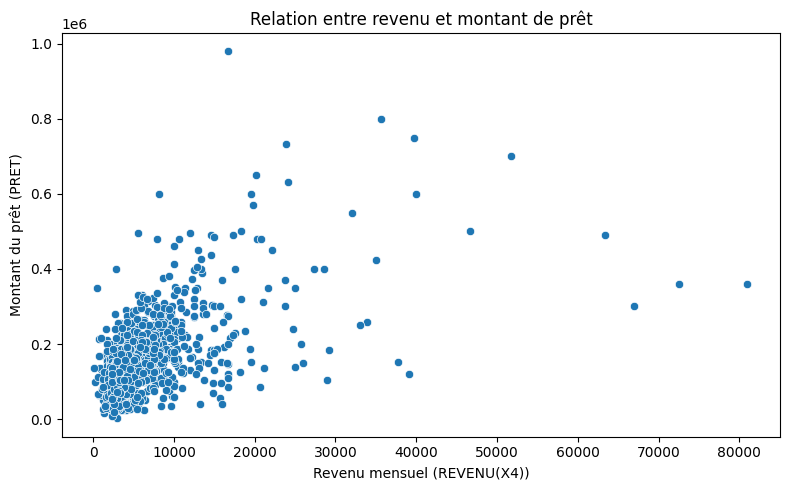

In [9]:
plt.figure()
sns.scatterplot(x=df["REVENU(X4)"], y=df["PRET"])
plt.xlabel("Revenu mensuel (REVENU(X4))")
plt.ylabel("Montant du prêt (PRET)")
plt.title("Relation entre revenu et montant de prêt")
plt.tight_layout()
plt.show()


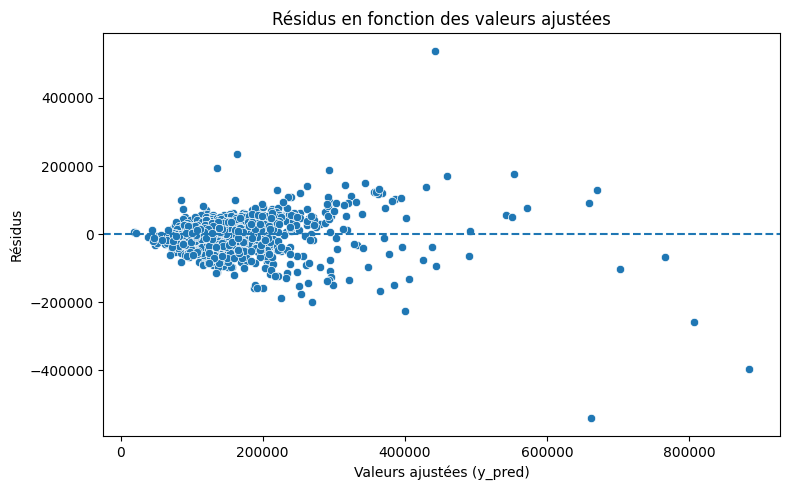

In [10]:
plt.figure()
sns.scatterplot(x=df["y_pred"], y=df["residu"])
plt.axhline(0, linestyle="--")
plt.xlabel("Valeurs ajustées (y_pred)")
plt.ylabel("Résidus")
plt.title("Résidus en fonction des valeurs ajustées")
plt.tight_layout()
plt.show()


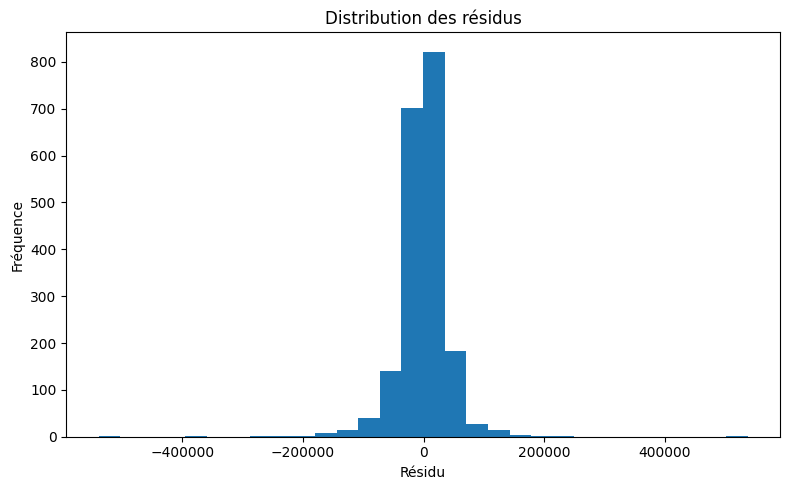

In [11]:
plt.figure()
plt.hist(df["residu"], bins=30)
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.title("Distribution des résidus")
plt.tight_layout()
plt.show()
